# Graph III


In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [13]:
# State schema
class AgentState(TypedDict):
    name:str
    age:str
    final:str


# Nodes
def first_node(state:AgentState)->AgentState:
    """This is the first node of our sequence"""
    state['final'] = f"Hi, {state['name']}"
    return state

def second_node(state:AgentState)->AgentState:
    """This is the second node of our sequence"""
    state['final'] = state['final'] + f" You are {state['age']} years old"
    return state


graph = StateGraph(AgentState)


graph.add_node("First_NODE",first_node)
graph.add_node("Second_NODE",second_node)

graph.set_entry_point("First_NODE")
graph.add_edge("First_NODE","Second_NODE")
graph.set_finish_point("Second_NODE")

app = graph.compile()

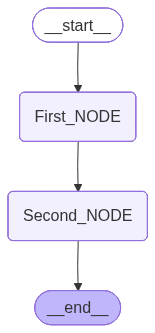

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
result = app.invoke({"name":"Charlie","age":20})
print(result)

{'name': 'Charlie', 'age': 20, 'final': 'Hi, Charlie You are 20 years old'}


<img src="./assets/exercises/exercise_3.png" height=600px>

In [15]:
from typing import List,TypedDict
from langgraph.graph import StateGraph

## State Schema Creation
class AgentState(TypedDict):
    name:str
    age:str
    skills:List
    result:str


## Creating Nodes
def first_node(state:AgentState)->AgentState:
    """ Personalize a Message for Name Field """
    state['result'] = f"Hi {state['name']}, Welcome to the System! "
    return state

def second_node(state:AgentState)->AgentState:
    """Personalize a Message for Age Field"""
    state['result'] = state['result'] + f"You are {state['age']} years old! "
    return state

def third_node(state:AgentState)->AgentState:
    """Combines all the skill and present to the user"""
    cbs = str(",".join(state['skills']))
    print(cbs)
    state['result'] = state['result'] + f"Your Skills are {cbs}"
    return state


graph = StateGraph(AgentState)

graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_node("third_node",third_node)

graph.add_edge("first_node","second_node")
graph.add_edge("second_node","third_node")

graph.set_entry_point("first_node")
graph.set_finish_point("third_node")


app = graph.compile()

result = app.invoke({'name':'Linda','age':'31','skills':['Python','Machine Learning','Langgraph']})

Python,Machine Learning,Langgraph


In [16]:
result['result']

'Hi Linda, Welcome to the System! You are 31 years old! Your Skills are Python,Machine Learning,Langgraph'

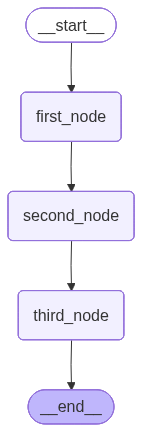

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))